# Calculate COVID-19 Data

In [28]:
import numpy as np
import csv
import matplotlib.pyplot as plt

In [5]:
data = []
with open("./simple_covid_large_data.csv", "r", encoding="utf-8") as file:
    read_file = csv.reader(file)
    for row in read_file:
        data.append(row)

remove_header_array = data[1:]

In [9]:
np_array = np.array(remove_header_array)

# first find shape
print("Shape of data \n", np_array.shape)

# second find the dimension
print("Dimension of data \n", np_array.ndim)


# view the data set
print(data[0])
print(np_array[0])



Shape of data 
 (1000, 5)
Dimension of data 
 2
['Country', 'Date', 'Confirmed', 'Recovered', 'Deaths']
['Japan' '2021-01-16' '96708' '56841' '10390']


In [39]:
# total confirmed patient
confirmed = np.sum(np_array[: , 2].astype(int), axis=0)
print("Total COVID-19 Patient ", confirmed)

# total Recovered patient
recovered = np.sum(np_array[: , 3].astype(int), axis=0)
print("Total Recovered Patient", recovered)

# total Deaths
deaths = np.sum(np_array[: , 4].astype(int), axis=0)
print("Total Recovered Deaths", deaths)



Total COVID-19 Patient  49831438
Total Recovered Patient 25177720
Total Recovered Deaths 12272882


/tmp/ipykernel_16794/792812209.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


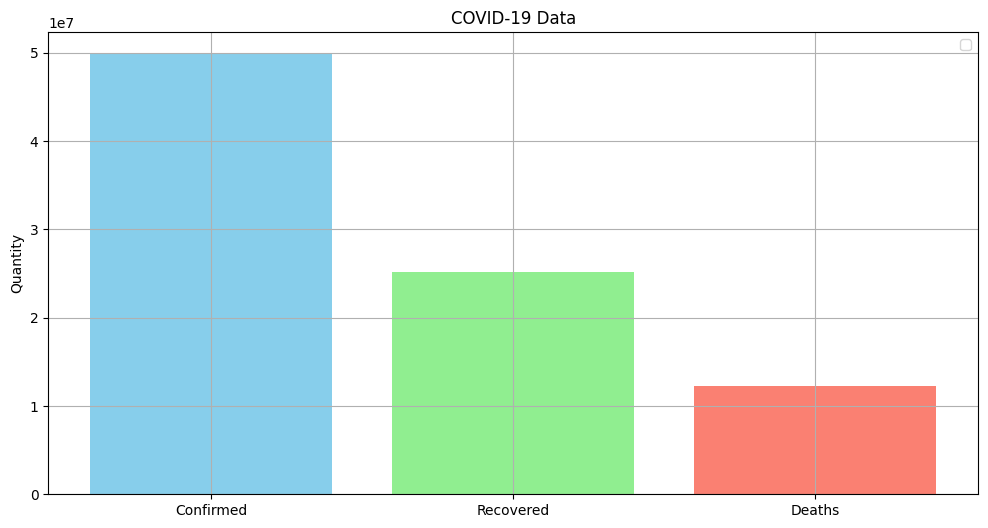

In [40]:
plt.figure(figsize=(12,6))
labels = ["Confirmed", "Recovered", "Deaths"]
values = [confirmed, recovered, deaths]
colors = ["skyblue", "lightgreen", "salmon"]
plt.bar(labels, values, color=colors)
plt.ylabel("Quantity")
plt.title("COVID-19 Data")
plt.legend()
plt.grid(True)


In [41]:
# country base 
countries = np.unique(np_array[: , 0])
country_confirmed = []
country_recovered = []
country_death = []
for country in countries:
    each_confirmed = np.sum(np_array[np_array[:, 0] == country][: ,2].astype(int))
    each_recovered = np.sum(np_array[np_array[: , 0] == country][: , 3].astype(int))
    each_death = np.sum(np_array[np_array[: , 0] == country][: , 4].astype(int))
    country_confirmed.append(each_confirmed)
    country_recovered.append(each_recovered)
    country_death.append(each_death)

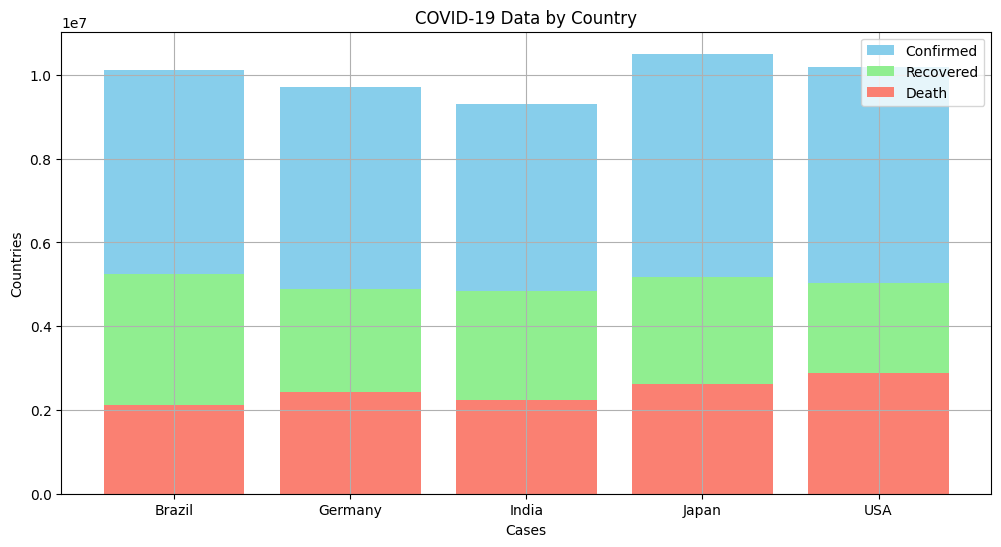

In [42]:
plt.figure(figsize=(12,6))
plt.bar(countries , country_confirmed , label="Confirmed",color="skyblue")
plt.bar(countries , country_recovered , label="Recovered",color="lightgreen")
plt.bar(countries , country_death , label="Death",color="salmon")
plt.xlabel("Cases")
plt.ylabel("Countries")
plt.title("COVID-19 Data by Country")
plt.legend()
plt.grid(True)